<a href="https://colab.research.google.com/github/iKiYo/Test-Code-of-DeepKT-TF2/blob/master/my_DKT_%2B_tempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Download assistment 2012 dataset

#### use edudata, a downloader of IST educational datasets

In [ ]:
!pip install EduData

In [ ]:
!edudata ls

In [ ]:
!edudata download assistment-2012-2013-non-skill

#### Use stored data in Gdrive

In [ ]:
import pandas as pd
assistment_2012_dataset = pd.read_csv("/content/drive/My Drive/master thesis/Datasets/assistment_dataset/2012-2013-data-with-predictions-4-final.csv")

### Data statistic and preprocessing of assistment_2012, which contains timestamps of attempts

In [ ]:
print(len(assistment_2012_dataset))
assistment_2012_dataset.head(1)
print(list(assistment_2012_dataset.columns.values)) # get the list of column header

6123270
['problem_log_id', 'skill', 'problem_id', 'user_id', 'assignment_id', 'assistment_id', 'start_time', 'end_time', 'problem_type', 'original', 'correct', 'bottom_hint', 'hint_count', 'actions', 'attempt_count', 'ms_first_response', 'tutor_mode', 'sequence_id', 'student_class_id', 'position', 'type', 'base_sequence_id', 'skill_id', 'teacher_id', 'school_id', 'overlap_time', 'template_id', 'answer_id', 'answer_text', 'first_action', 'problemlogid', 'Average_confidence(FRUSTRATED)', 'Average_confidence(CONFUSED)', 'Average_confidence(CONCENTRATING)', 'Average_confidence(BORED)']


##### XXX: skill_id has more types than skill(name)??

In [ ]:
print( assistment_2012_dataset.skill_id.unique())
print( assistment_2012_dataset.skill.unique())

In [ ]:
print( assistment_2012_dataset[['user_id', 'skill', 'skill_id','problem_id','assignment_id','assistment_id']].nunique())

user_id           46674
skill               198
skill_id            265
problem_id       179999
assignment_id    189760
assistment_id    138555
dtype: int64


#### try out drop nan and check skill

In [ ]:
assistment_2012_dataset_selected = pd.read_csv(
    "/content/drive/My Drive/master thesis/Datasets/assistment_dataset/2012-2013-data-with-predictions-4-final.csv",
    usecols=['problem_log_id', 'skill', 'problem_id', 'user_id', 'assignment_id', 'assistment_id', 'start_time', 'end_time', 'correct', 'attempt_count', 'skill_id'])
print(len(assistment_2012_dataset_selected))
assistment_2012_dataset_selected.head(1)

6123270


,problem_log_id,skill,problem_id,user_id,assignment_id,assistment_id,start_time,end_time,correct,attempt_count,skill_id
0,137792159,NaN,557460,61394,565736,341511,2012-09-28 15:11:27,2012-09-28 15:11:36.856,1.0,1,NaN


In [ ]:
df = assistment_2012_dataset_selected[['skill', 'skill_id']].dropna()

In [ ]:
df = df.astype({'skill_id': 'int32'})

,skill,skill_id
1,Rounding,54
2,Multiplication and Division Integers,279
3,Proportion,79
5,Exponents,86
7,Equation Solving Two or Fewer Steps,311
...,...,...
6123258,Exponents,86
6123260,Square Root,75
6123262,Unit Conversion Within a System,34
6123264,Multiplication Fractions,67


In [ ]:
df.nunique()

skill       198
skill_id    245
dtype: int64

#### make a complete and minimum csv dataset for experiments

In [ ]:
import pandas as pd 
assist2012_preprocessed = pd.read_csv(
    "/content/drive/My Drive/master thesis/Datasets/assistment_dataset/2012-2013-data-with-predictions-4-final.csv",
    usecols=['problem_id', 'user_id', 'start_time', 'end_time', 'correct', 'attempt_count', 'skill_id'])
print(len(assist2012_preprocessed))
assist2012_preprocessed.head(1)

6123270


,problem_id,user_id,start_time,end_time,correct,attempt_count,skill_id
0,557460,61394,2012-09-28 15:11:27,2012-09-28 15:11:36.856,1.0,1,NaN


In [ ]:
df = assist2012_preprocessed
#df = df.dropna()
print(df.correct.nunique())
df = df.drop_duplicates(subset=['problem_id','user_id','attempt_count'])
df = df.fillna(value={'skill_id': 999})
df = df.astype({'skill_id': 'int32'})
print(len(df))
df.nunique()

13
5945174


problem_id        179999
user_id            46674
start_time       4571084
end_time         5943356
correct               13
attempt_count         30
skill_id             266
dtype: int64

In [ ]:
df = df[df["correct"].isin([0, 1])]
df

,problem_id,user_id,start_time,end_time,correct,attempt_count,skill_id
0,557460,61394,2012-09-28 15:11:27,2012-09-28 15:11:36.856,1.0,1,999
1,365981,61394,2012-10-09 11:01:52,2012-10-09 11:02:13.182,1.0,1,54
2,426415,61394,2013-03-07 10:53:20,2013-03-07 10:53:28.661,0.0,1,279
3,86686,61394,2013-08-20 19:54:56,2013-08-20 19:55:21.753,1.0,1,79
4,399669,76592,2012-09-10 17:20:10,2012-09-10 17:24:56.579,1.0,1,999
...,...,...,...,...,...,...,...
6123265,330756,227984,2013-08-30 10:10:55,2013-08-30 10:11:08.935,1.0,1,999
6123266,765964,228009,2013-08-31 10:23:24,2013-08-31 10:23:27.757,0.0,1,999
6123267,84891,228039,2013-08-30 11:29:35,2013-08-30 11:30:05.517,0.0,1,277
6123268,543973,228055,2013-08-30 11:52:37,2013-08-30 11:52:41.251,1.0,1,999


In [ ]:
# change 'correct' column into a boolean format as recommended in ASSIST dataset website
df['correct'] = (df['correct'] >= 1).astype(int)
df

,problem_id,user_id,start_time,end_time,correct,attempt_count,skill_id
0,557460,61394,2012-09-28 15:11:27,2012-09-28 15:11:36.856,1,1,999
1,365981,61394,2012-10-09 11:01:52,2012-10-09 11:02:13.182,1,1,54
2,426415,61394,2013-03-07 10:53:20,2013-03-07 10:53:28.661,0,1,279
3,86686,61394,2013-08-20 19:54:56,2013-08-20 19:55:21.753,1,1,79
4,399669,76592,2012-09-10 17:20:10,2012-09-10 17:24:56.579,1,1,999
...,...,...,...,...,...,...,...
6123265,330756,227984,2013-08-30 10:10:55,2013-08-30 10:11:08.935,1,1,999
6123266,765964,228009,2013-08-31 10:23:24,2013-08-31 10:23:27.757,0,1,999
6123267,84891,228039,2013-08-30 11:29:35,2013-08-30 11:30:05.517,0,1,277
6123268,543973,228055,2013-08-30 11:52:37,2013-08-30 11:52:41.251,1,1,999


In [ ]:
df.correct.value_counts(normalize=True)

1.0    0.674026
0.0    0.325974
Name: correct, dtype: float64

In [ ]:
df.attempt_count.unique()

array([ 1,  2, 13,  3,  4,  8, 11,  5,  0,  7, 19,  6, 10, 12, 15, 26, 17,
       14,  9, 24, 16, 20, 22, 18, 29, 23, 27, 28, 21, 25])

In [ ]:
counts = df['user_id'].value_counts()
selected_df= df[~df['user_id'].isin(counts[counts < 2].index)]
selected_df

,problem_id,user_id,start_time,end_time,correct,attempt_count,skill_id
0,557460,61394,2012-09-28 15:11:27,2012-09-28 15:11:36.856,1.0,1,999
1,365981,61394,2012-10-09 11:01:52,2012-10-09 11:02:13.182,1.0,1,54
2,426415,61394,2013-03-07 10:53:20,2013-03-07 10:53:28.661,0.0,1,279
3,86686,61394,2013-08-20 19:54:56,2013-08-20 19:55:21.753,1.0,1,79
4,399669,76592,2012-09-10 17:20:10,2012-09-10 17:24:56.579,1.0,1,999
...,...,...,...,...,...,...,...
6123265,330756,227984,2013-08-30 10:10:55,2013-08-30 10:11:08.935,1.0,1,999
6123266,765964,228009,2013-08-31 10:23:24,2013-08-31 10:23:27.757,0.0,1,999
6123267,84891,228039,2013-08-30 11:29:35,2013-08-30 11:30:05.517,0.0,1,277
6123268,543973,228055,2013-08-30 11:52:37,2013-08-30 11:52:41.251,1.0,1,999


In [ ]:
selected_df['user_id'].value_counts()

221054    4760
220012    3551
169527    3421
92113     3289
218757    3157
          ... 
177088       2
198066       2
198995       2
194926       2
203435       2
Name: user_id, Length: 45969, dtype: int64

In [ ]:
df[df['user_id'] == 221324]

,problem_id,user_id,start_time,end_time,correct,attempt_count,skill_id
381890,108501,221324,2013-06-16 23:01:02,2013-06-16 23:01:27.992,1.0,1,999
4771501,108499,221324,2013-06-16 23:02:32,2013-06-16 23:03:08.199,1.0,1,999


In [ ]:
skill_counts = selected_df['skill_id'].value_counts()

In [ ]:
skill_counts

999    3325272
311     182937
277     144084
280     143417
47       95336
        ...   
38           5
178          4
611          3
177          1
291          1
Name: skill_id, Length: 266, dtype: int64

In [ ]:
len(counts)

46674

In [ ]:
len(selected_df) - 3325272

2613897

In [ ]:
selected_df.nunique()

problem_id        179969
user_id            45976
start_time       4570663
end_time         5942658
correct               13
attempt_count         30
skill_id             266
dtype: int64

In [ ]:
len(selected_df.drop_duplicates())

5944476

In [ ]:
df[df['attempt_count'] == 0]

,problem_id,user_id,end_time,correct,attempt_count,skill_id
235,108293,93574,2012-11-19 13:03:48.491,0,0,312
426,139575,100652,2012-11-07 17:43:37.193,0,0,17
940,108032,122049,2013-02-28 21:08:19.107,0,0,312
1174,554729,124084,2012-09-20 19:27:23.994,0,0,999
1292,545347,125416,2012-09-05 16:08:53.307,0,0,999
...,...,...,...,...,...,...
6122746,170731,221915,2013-07-18 11:12:27.053,0,0,39
6122822,12383,222500,2013-08-26 19:40:32.453,0,0,47
6123001,12387,223445,2013-07-31 21:46:45.393,0,0,91
6123188,765824,225944,2013-08-30 12:57:26.138,0,0,999


In [ ]:
counts = selected_df['end_time'].value_counts()
dub_time_df= selected_df[~selected_df['end_time'].isin(counts[counts < 2].index)]
dub_time_df

,problem_id,user_id,start_time,end_time,correct,attempt_count,skill_id
20,543983,85334,2012-09-04 13:54:23,2012-09-04 13:54:25.611,1.0,1,999
770,72689,120299,2012-09-10 08:08:10,2012-09-10 08:08:32.772,0.0,1,999
4310,431679,176267,2013-02-25 15:46:09,2013-02-25 15:46:21.683,1.0,1,999
7260,399575,183449,2013-02-25 09:46:53,2013-02-25 09:48:28.763,0.0,2,999
7310,169675,183656,2013-04-05 14:04:57,2013-04-05 14:05:33.849,1.0,1,296
...,...,...,...,...,...,...,...
6114158,536990,171500,2012-09-07 11:46:31,2012-09-07 11:47:07.181,0.0,2,999
6115521,522445,176289,2012-10-02 10:18:16,2012-10-02 10:18:21.12,1.0,1,999
6116011,416575,177016,2012-11-16 10:42:34,2012-11-16 10:44:27.128,0.0,1,999
6120808,569758,204174,2013-01-24 08:42:55,2013-01-24 08:43:05.613,1.0,1,999


In [ ]:
dub_time_df[dub_time_df['end_time'] == '2012-10-12 13:41:00.974']

,problem_id,user_id,start_time,end_time,correct,attempt_count,skill_id
838240,90190,132804,2012-10-12 13:40:56,2012-10-12 13:41:00.974,1.0,1,279
2174014,562048,188843,2012-10-12 13:40:59,2012-10-12 13:41:00.974,1.0,1,999


In [ ]:
dub_time_df['end_time'].value_counts()

2012-10-02 16:46:42.859    2
2012-10-12 13:41:00.974    2
2012-10-09 10:35:47.266    2
2012-11-07 14:23:09.615    2
2013-01-24 10:22:13.483    2
                          ..
2013-01-29 11:04:26.04     2
2012-11-02 12:45:51.032    2
2013-05-02 10:44:39.726    2
2012-12-13 13:47:23.056    2
2012-09-13 10:12:46.661    2
Name: end_time, Length: 1818, dtype: int64

#### (drop NaN ) make a complete and minimum csv dataset for experiments

In [ ]:
import pandas as pd 
assist2012_preprocessed = pd.read_csv(
    "/content/drive/My Drive/master thesis/Datasets/assistment_dataset/2012-2013-data-with-predictions-4-final.csv",
    usecols=['assistment_id', 'user_id', 'start_time', 'end_time', 'correct', 'attempt_count', 'skill_id', 'skill'])
print(len(assist2012_preprocessed))
assist2012_preprocessed.head(1)

6123270


,skill,user_id,assistment_id,start_time,end_time,correct,attempt_count,skill_id
0,NaN,61394,341511,2012-09-28 15:11:27,2012-09-28 15:11:36.856,1.0,1,NaN


In [ ]:
df = assist2012_preprocessed
print(len(df))
#df = df.drop_duplicates(subset=['problem_id','user_id','attempt_count'])
df = df.drop_duplicates()
print(len(df))
df = df.dropna(subset=['skill_id', 'skill' ])
# change 'correct' column into a boolean format as recommended in ASSIST dataset website
#df['correct'] = (df['correct'] >= 1).astype(int)
df = df[df["correct"].isin([0, 1])]
df = df.astype({'skill_id': 'int32'})
print(len(df))
df.nunique()

6123270


KeyboardInterrupt: ignored

##### WARNING: 70% of attempts(labels) are correct

In [ ]:
df.correct.value_counts(normalize=True)

1.0    0.696326
0.0    0.303674
Name: correct, dtype: float64

In [ ]:
df

,skill,problem_id,user_id,start_time,end_time,correct,attempt_count,skill_id
1,Rounding,365981,61394,2012-10-09 11:01:52,2012-10-09 11:02:13.182,1.0,1,54
2,Multiplication and Division Integers,426415,61394,2013-03-07 10:53:20,2013-03-07 10:53:28.661,0.0,1,279
3,Proportion,86686,61394,2013-08-20 19:54:56,2013-08-20 19:55:21.753,1.0,1,79
5,Exponents,401234,76592,2012-12-12 21:00:55,2012-12-12 21:01:07.536,1.0,1,86
7,Equation Solving Two or Fewer Steps,87699,78401,2012-10-16 10:30:54,2012-10-16 10:31:55.445,1.0,1,311
...,...,...,...,...,...,...,...,...
6123258,Exponents,58783,227685,2013-08-29 15:23:54,2013-08-29 15:25:25.441,1.0,1,86
6123260,Square Root,117,227788,2013-08-29 16:18:36,2013-08-29 16:19:08.388,1.0,1,75
6123262,Unit Conversion Within a System,123251,227839,2013-08-31 15:15:01,2013-08-31 15:15:08.024,1.0,1,34
6123264,Multiplication Fractions,86906,227908,2013-08-31 00:23:38,2013-08-31 00:25:16.236,0.0,3,67


In [ ]:
# remove users with a sequence length less than three
counts = df['user_id'].value_counts()
selected_df= df[~df['user_id'].isin(counts[counts < 3].index)]
print(len(selected_df))
selected_df.nunique()

2627477


skill                198
user_id            27145
assistment_id      45378
start_time       2309874
end_time         2627117
correct                2
attempt_count         30
skill_id             245
dtype: int64

In [ ]:
selected_df.drop_duplicates()

,skill,user_id,assistment_id,start_time,end_time,correct,attempt_count,skill_id
1,Rounding,61394,204043,2012-10-09 11:01:52,2012-10-09 11:02:13.182,1.0,1,54
2,Multiplication and Division Integers,61394,247525,2013-03-07 10:53:20,2013-03-07 10:53:28.661,0.0,1,279
3,Proportion,61394,48081,2013-08-20 19:54:56,2013-08-20 19:55:21.753,1.0,1,79
5,Exponents,76592,228996,2012-12-12 21:00:55,2012-12-12 21:01:07.536,1.0,1,86
7,Equation Solving Two or Fewer Steps,78401,49019,2012-10-16 10:30:54,2012-10-16 10:31:55.445,1.0,1,311
...,...,...,...,...,...,...,...,...
6123258,Exponents,227685,37197,2013-08-29 15:23:54,2013-08-29 15:25:25.441,1.0,1,86
6123260,Square Root,227788,117,2013-08-29 16:18:36,2013-08-29 16:19:08.388,1.0,1,75
6123262,Unit Conversion Within a System,227839,64904,2013-08-31 15:15:01,2013-08-31 15:15:08.024,1.0,1,34
6123264,Multiplication Fractions,227908,48296,2013-08-31 00:23:38,2013-08-31 00:25:16.236,0.0,3,67


In [ ]:
selected_df['user_id'].value_counts()

179953    1845
179948    1602
180029    1582
223733    1486
179664    1387
          ... 
226002       4
142592       4
178924       4
182242       4
191767       4
Name: user_id, Length: 26358, dtype: int64

In [ ]:
tdf = selected_df[selected_df['user_id'] == 221324]
#selected_df["timestamp"] = pd.to_datetime(["end_time"])

NameError: ignored

In [ ]:
skill_counts = selected_df['skill_id'].value_counts()

In [ ]:
skill_counts

311    192913
277    151008
280    146923
47      98608
279     84276
        ...  
38          5
178         4
611         3
177         3
291         1
Name: skill_id, Length: 265, dtype: int64

In [ ]:
len(counts)

46674

In [ ]:
len(selected_df)

2709647

In [ ]:
selected_df.nunique()

problem_id        179980
user_id            46023
end_time         6120034
correct                2
attempt_count         30
skill_id             266
dtype: int64

In [ ]:
df[df['attempt_count'] == 0]

,problem_id,user_id,end_time,correct,attempt_count,skill_id
235,108293,93574,2012-11-19 13:03:48.491,0,0,312
426,139575,100652,2012-11-07 17:43:37.193,0,0,17
940,108032,122049,2013-02-28 21:08:19.107,0,0,312
1174,554729,124084,2012-09-20 19:27:23.994,0,0,999
1292,545347,125416,2012-09-05 16:08:53.307,0,0,999
...,...,...,...,...,...,...
6122746,170731,221915,2013-07-18 11:12:27.053,0,0,39
6122822,12383,222500,2013-08-26 19:40:32.453,0,0,47
6123001,12387,223445,2013-07-31 21:46:45.393,0,0,91
6123188,765824,225944,2013-08-30 12:57:26.138,0,0,999


In [ ]:
import numpy as np
import pandas as pd
from scipy import sparse
import argparse
import os

data_name = "/content/drive/My Drive/master thesis/Datasets/assistment_dataset/2012-2013-data-with-predictions-4-final.csv"
min_interactions_per_user = 0
remove_nan_skills = True


"""Preprocess ASSISTments dataset.

Arguments:
    data_name: "assistments09", "assistments12", "assistments15" or "assistments17"
    min_interactions_per_user (int): minimum number of interactions per student
    remove_nan_skills (bool): if True, remove interactions with no skill tag
Outputs:
    df (pandas DataFrame): preprocessed ASSISTments dataset with user_id, item_id,
        timestamp and correct features
    Q_mat (item-skill relationships sparse array): corresponding q-matrix
"""
#data_path = os.path.join("data", data_name)
#df = pd.read_csv(os.path.join(data_path, "data.csv"), encoding="ISO-8859-1")
df = pd.read_csv(os.path.join(data_name))
data_name = "assistments12"

In [ ]:
df = df.rename(columns={"problem_id": "item_id"})
df["timestamp"] = pd.to_datetime(df["start_time"])
print(df.dtypes)

problem_log_id                                int64
skill                                        object
item_id                                       int64
user_id                                       int64
assignment_id                                 int64
assistment_id                                 int64
start_time                                   object
end_time                                     object
problem_type                                 object
original                                      int64
correct                                     float64
bottom_hint                                 float64
hint_count                                    int64
actions                                      object
attempt_count                                 int64
ms_first_response                             int64
tutor_mode                                   object
sequence_id                                   int64
student_class_id                              int64
position    

In [ ]:
df["timestamp"] = df["timestamp"] - df["timestamp"].min()

In [ ]:
df["timestamp"] = df["timestamp"].apply(lambda x: x.total_seconds()).astype(np.int64)

In [ ]:
# Sort data temporally
if data_name in ["assistments12", "assistments17"]:
    df.sort_values(by="timestamp", inplace=True)
elif data_name == "assistments09":
    df.sort_values(by="order_id", inplace=True)
elif data_name == "assistments15":
    df.sort_values(by="log_id", inplace=True)

# Filter too short sequences
df = df.groupby("user_id").filter(lambda x: len(x) >= min_interactions_per_user)

# Remove continuous outcomes
df = df[df["correct"].isin([0, 1])]
df["correct"] = df["correct"].astype(np.int32)

# Filter nan skills
if remove_nan_skills:
    df = df[~df["skill_id"].isnull()]
else:
    df.ix[df["skill_id"].isnull(), "skill_id"] = -1

df["user_id"] = np.unique(df["user_id"], return_inverse=True)[1]
df["item_id"] = np.unique(df["item_id"], return_inverse=True)[1]
df["skill_id"] = np.unique(df["skill_id"], return_inverse=True)[1]

# Build Q-matrix
Q_mat = np.zeros((len(df["item_id"].unique()), len(df["skill_id"].unique())))
for item_id, skill_id in df[["item_id", "skill_id"]].values:
    Q_mat[item_id, skill_id] = 1



df = df[['user_id', 'item_id', 'timestamp', 'correct']]
df.reset_index(inplace=True, drop=True)


In [ ]:
data_path = "./"

# Save data
sparse.save_npz(os.path.join(data_path, "q_mat.npz"), sparse.csr_matrix(Q_mat))
df.to_csv(os.path.join(data_path, "preprocessed_data.csv"), sep="\t", index=False)

In [ ]:
pre_df = pd.read_csv("/content/preprocessed_data.csv", sep="\t")
pre_df.nunique()


user_id        29018
item_id        53086
timestamp    2362589
correct            2
dtype: int64

In [ ]:
import random
from random import shuffle
from sklearn.metrics import roc_auc_score, accuracy_score

import torch
from torch.nn.utils.rnn import pad_sequence


def set_random_seeds(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    random.seed(seed)
    
    
def get_data(df, train_split=0.8):
    num_items = df["item_id"].nunique()
    data = [(torch.tensor(u_df["item_id"].values, dtype=torch.long),
             torch.tensor(u_df["correct"].values, dtype=torch.long))
            for _, u_df in df.groupby("user_id")]
    data = [(torch.cat((torch.zeros(1, dtype=torch.long), item_ids + labels * num_items + 1))[:-1], item_ids, labels)
            for (item_ids, labels) in data]
    shuffle(data)

    # Train-test split across users
    train_size = int(train_split * len(data))
    train_data, val_data = data[:train_size], data[train_size:]
    return train_data, val_data


def prepare_batches(data, batch_size):
    """Prepare batches grouping padded sequences.
    
    Arguments:
        data (list of tuples of torch Tensor)
        batch_size (int): number of sequences per batch
        
    Output:
        batches (list of tuples of torch Tensor)
    """
    shuffle(data)
    batches = []

    for k in range(0, len(data), batch_size):
        batch = data[k:k + batch_size]
        inputs, item_ids, labels = zip(*batch)

        inputs = pad_sequence(inputs, batch_first=True, padding_value=0)     # Pad with 0
        item_ids = pad_sequence(item_ids, batch_first=True, padding_value=0) # Don't care
        labels = pad_sequence(labels, batch_first=True, padding_value=-1)    # Pad with -1

        batches.append([inputs, item_ids, labels])
        
    return batches


def compute_auc(preds, item_ids, labels):
    labels = labels.view(-1)
    item_ids = item_ids.view(-1)[labels >= 0]
    preds = preds.view(-1, preds.shape[-1])[labels >= 0]
    preds = preds[torch.arange(preds.shape[0]), item_ids]
    labels = labels[labels >= 0].float()

    if len(torch.unique(labels)) == 1: # Only one class
        auc = accuracy_score(labels, preds.round())
    else:
        auc = roc_auc_score(labels, preds)
    return auc


def compute_loss(preds, item_ids, labels, criterion):
    labels = labels.view(-1)
    item_ids = item_ids.view(-1)[labels >= 0]
    preds = preds.view(-1, preds.shape[-1])[labels >= 0]
    preds = preds[torch.arange(preds.shape[0]), item_ids]
    labels = labels[labels >= 0].float()
    return criterion(preds, labels)

## Model Codes

### try neptune.ai

In [ ]:
!pip install neptune-client

In [ ]:
env NEPTUNE_API_TOKEN=""

In [ ]:
import neptune
neptune.init('ikiyo/sandbox')

with neptune.create_experiment():
    neptune.send_metric('auc', 0.92)

### DKT code of exepriments of spaced tempral effect
https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwiU6pDN7M_rAhW_A2MBHU3gD3AQFjABegQIARAB&url=https%3A%2F%2Feducationaldatamining.org%2Ffiles%2Fconferences%2FEDM2020%2Fpapers%2Fpaper_242.pdf&usg=AOvVaw1frKbFoVwfcA-a4XGEAw2i

!git clone https://github.com/thosgt/kt-algos.git

In [190]:
!cp -r "/content/drive/My Drive/master thesis/Source code/kt-algos" ./

In [ ]:
cd kt-algos

In [ ]:
pip install -r requirements.txt

In [6]:
!mkdir -p data/assistments12

In [9]:
!cp "/content/drive/My Drive/master thesis/Datasets/assistment_dataset/2012-2013-data-with-predictions-4-final.csv" ./data/assistments12/data.csv

In [10]:
!python prepare_data.py --dataset assistments12 --remove_nan_skills

In [ ]:
!python train_dkt.py --dataset assistments12 --embed_inputs --embed_size=100 --hid_size=100 --batch_size=5

### original DKT
The code is written with Lua and Torch, cannot convert to PyTorch

In [ ]:
!git clone https://github.com/chrispiech/DeepKnowledgeTracing.git

Cloning into 'DeepKnowledgeTracing'...
remote: Enumerating objects: 125, done.
remote: Total 125 (delta 0), reused 0 (delta 0), pack-reused 125
Receiving objects: 100% (125/125), 3.44 MiB | 26.68 MiB/s, done.
Resolving deltas: 100% (48/48), done.


### iKiYo DKT in TF2

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.test.is_gpu_available())

In [165]:
# data dependent parameters
num_student = 1000
num_skills = 5 #M
max_sequence_length =  6 # T

# model parmaeters
hidden_units=20
dropout_rate=0
embed_dim = 5 #N
learning_rate = 0.1

##### sin fucntion sample data

In [55]:
def sin(x, T=100):
  return np.sin(2.0* np.pi * x /T)

def toy_problem(T=100, ampl=0.1):
  x = np.arange(0, 2*T+1)
  noise = ampl * np.random.uniform(low=-1.0, high=1.0, size=len(x))
  return sin(x) + noise

T = 100
f = toy_problem(T)

f[0:10]

array([-0.07963074,  0.03908419,  0.14838307,  0.1296413 ,  0.311248  ,
        0.31232588,  0.2815356 ,  0.33998949,  0.45435879,  0.49270995])

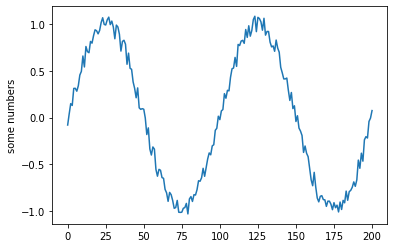

In [56]:
import matplotlib.pyplot as plt
plt.plot(f)
plt.ylabel('some numbers')
plt.show()

##### sample data

In [191]:
# q question ids
raw_inputs = np.array([
    [1, 3, 4],
   [3, 4, 2, 1, 2],
   [3, 1, 1, 4, 5, 2],
])
# a answer or attempts on the questions
raw_labels =  np.array([
    [1, 1, 1],
   [0, 0, 0, 1, 1],
   [0, 1, 1, 1, 0, 1],
])

print(F"raw_inputs \n{raw_inputs}")
print(F"raw_labels \n{raw_labels}")
print()

raw_inputs 
[list([1, 3, 4]) list([3, 4, 2, 1, 2]) list([3, 1, 1, 4, 5, 2])]
raw_labels 
[list([1, 1, 1]) list([0, 0, 0, 1, 1]) list([0, 1, 1, 1, 0, 1])]



##### data preprocessing

In [192]:
# padded_q
# padding is -1 and adjust indeces of tensors
padded_inputs = tf.keras.preprocessing.sequence.pad_sequences(
    raw_inputs, maxlen=max_sequence_length, padding="post", value=0
)
# Warning: supposing the question ids 1> , 
padded_inputs = padded_inputs - 1
print(F"padded_inputs :\n{padded_inputs}")

# padded_a
# padding is 1 to set the padding of x_t to -1
padded_labels= tf.keras.preprocessing.sequence.pad_sequences(
    raw_labels, maxlen=max_sequence_length, padding="post", value=1
)
print(F"padded_labels:\n {padded_labels}") # q_t
print()

"""
M to 2M vector
binary => correct columns + incorrect columns 
"""
# raw_x_t = M*(1 - a_t) + q_t 
signaled_input = num_skills * ( 1 - padded_labels) + padded_inputs
print(F"signaled_input:\n{signaled_input}")
print()

# x_t
one_hot_input = tf.one_hot(input, depth=num_skills*2, axis=-1)
print(F"x_t sample:\n{one_hot_input.numpy()[0]}")
print(one_hot_input.numpy().shape)
print()

# delta(q_t)
one_hot_q_t = tf.one_hot(padded_inputs, depth=num_skills, axis=-1)
print(F"delta(q_t) sample:\n{one_hot_q_t.numpy()[0]}")
one_hot_q_t.numpy().shape

padded_inputs :
[[ 0  2  3 -1 -1 -1]
 [ 2  3  1  0  1 -1]
 [ 2  0  0  3  4  1]]
padded_labels:
 [[1 1 1 1 1 1]
 [0 0 0 1 1 1]
 [0 1 1 1 0 1]]

signaled_input:
[[ 0  2  3 -1 -1 -1]
 [ 7  8  6  0  1 -1]
 [ 7  0  0  3  9  1]]

x_t sample:
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(3, 6, 10)

delta(q_t) sample:
[[1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


(3, 6, 5)

##### build model

In [239]:
# FIXME: 
"""
WARNING:tensorflow:8 out of the last 15 calls to <function Model.make_test_function.<locals>.test_function at 0x7f55ca8a7a60>
 triggered tf.function retracing. 
 Tracing is expensive and the excessive number of tracings could be due to 
 (1) creating @tf.function repeatedly in a loop,
 (2) passing tensors with different shapes,
  (3) passing Python objects instead of tensors. 
  For (1), please define your @tf.function outside of the loop.
   For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. 
   For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args 
   and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
"""
class DKT(tf.keras.Model):
  def __init__(self):
    super().__init__()
    self.x = tf.keras.Input(shape=(None, max_sequence_length, num_skills*2), name='inputs')
    self.q = tf.keras.Input(shape=(None, max_sequence_length, num_skills), name='labels')

    self.emb =  layers.Dense(embed_dim, trainable=False, 
                                                        kernel_initializer=tf.keras.initializers.RandomNormal(seed=777),
                                                        input_shape=(None, max_sequence_length, num_skills*2))
    self.mask = layers.Masking(mask_value=0)
    self.lstm =  layers.LSTM(hidden_units, return_sequences=True)
    self.out_dropout =  layers.TimeDistributed(layers.Dropout(dropout_rate))
    self.out_sigmoid =  layers.TimeDistributed(layers.Dense(num_skills,  activation='sigmoid'))

    # HACK: the shape of q does not fit to Timedistributed operation(may be faster?)
    self.dot =  layers.Multiply()
    # self.dot =  layers.TimeDistributed(layers.Multiply())

    #self.reduce_sum = tf.reduce_sum
    #self.transpose = tf.transpose

    self.reduce_sum =  layers.Dense(1, trainable=False, 
                                                        kernel_initializer=tf.keras.initializers.constant(value=1),
                                                        input_shape=(None, max_sequence_length,num_skills))
    # reshape layer does not work as graph 
    # self.reshape_l = layers.Reshape((-1,3),dynamic=False)#, 
    #                                                      # input_shape=(None,max_sequence_length,num_skills,))
    self.final_mask =   layers.TimeDistributed(
      layers.Masking(mask_value=0, input_shape=(None, max_sequence_length,1))
    )


  def call(self, inputs):
    # x, q = inputs[0], inputs[1]
    self.x, self.q = inputs[0], inputs[1]

    # n = self.emb(x)
    n = self.emb(self.x)
    masked_n = self.mask(n)
    h = self.lstm(masked_n) 
    o = self.out_dropout(h)
    y_pred = self.out_sigmoid(o)
    # y_pred = self.dot([y_pred, q])
    y_pred = self.dot([y_pred, self.q])
    # y_pred = self.reduce_sum(y_pred, axis=2)
    y_pred = self.reduce_sum(y_pred)
    #y_pred = self.reshape_l(y_pred)
    #y_pred = self.transpose()
    y_pred = self.final_mask(y_pred)
    #y_pred._keras_mask=masked_n._keras_mask
    return y_pred

# Create an instance of the model
model = DKT()

# Configuration of model
# Set "SUM" to loss reduction in order to use distributed training
model.compile(loss=tf.keras.losses.BinaryCrossentropy(reduction=tf.keras.losses.Reduction.SUM),
                optimizer=tf.optimizers.SGD(learning_rate=learning_rate),
                metrics=[tf.keras.metrics.AUC()])
                # metrics=[tf.keras.metrics.AUC(),tf.keras.metrics.BinaryCrossentropy()]) # keep for debug loss

In [231]:
x = tf.keras.Input(shape=(32,))
y = tf.square(x)
y

<tf.Tensor 'Square_1:0' shape=(None, 32) dtype=float32>

In [240]:
# initialize and check model structure
# predictions = model([one_hot_input, one_hot_q_t])
predictions = model([one_hot_input, one_hot_q_t])
model.summary()

Model: "dkt_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_151 (Dense)            multiple                  55        
_________________________________________________________________
masking_113 (Masking)        multiple                  0         
_________________________________________________________________
lstm_57 (LSTM)               multiple                  2080      
_________________________________________________________________
time_distributed_155 (TimeDi multiple                  0         
_________________________________________________________________
time_distributed_156 (TimeDi multiple                  105       
_________________________________________________________________
multiply_57 (Multiply)       multiple                  0         
_________________________________________________________________
dense_153 (Dense)            multiple                  6    

In [225]:
# check the shapes of outputs
q = one_hot_q_t
n = model.emb(one_hot_input)
print(tf.shape(n))
masked_n = model.mask(n)
print(tf.shape(masked_n))
h = model.lstm(masked_n) 
print(tf.shape(h))
o = model.out_dropout(h)
y_pred = model.out_sigmoid(o)
print(tf.shape(y_pred))
y_pred = model.dot([y_pred, q])
print(tf.shape(y_pred))
y_pred = model.reduce_sum(y_pred)
print(tf.shape(y_pred))
y_pred = model.mask(y_pred)
print(tf.shape(y_pred))


tf.Tensor([3 6 5], shape=(3,), dtype=int32)
tf.Tensor([3 6 5], shape=(3,), dtype=int32)
tf.Tensor([ 3  6 20], shape=(3,), dtype=int32)
tf.Tensor([3 6 5], shape=(3,), dtype=int32)
tf.Tensor([3 6 5], shape=(3,), dtype=int32)
tf.Tensor([3 6 1], shape=(3,), dtype=int32)
tf.Tensor([3 6 1], shape=(3,), dtype=int32)


##### Check prediction and evaluation

In [234]:
predictions = model([one_hot_input, one_hot_q_t])

# check masking works correctly
print(predictions._keras_mask.numpy())
print(padded_inputs)
print()

# check shape of predicted vector
print("predcitions shape:")
print(predictions.shape) #num_student, T, M(num_skill or num_problem)
print(predictions, padded_labels)
print()

# TODO: avoid reshape before feeding
padded_labels = tf.reshape(padded_labels,(len(raw_labels),6,1))
#padded_labels = tf.transpose(padded_labels)
print(padded_labels.shape)
model.evaluate([one_hot_input, one_hot_q_t], padded_labels , verbose =2)

[[ True  True  True False False False]
 [ True  True  True  True  True False]
 [ True  True  True  True  True  True]]
[[ 0  2  3 -1 -1 -1]
 [ 2  3  1  0  1 -1]
 [ 2  0  0  3  4  1]]

predcitions shape:
(3, 6, 1)
tf.Tensor(
[[[0.49781767]
  [0.49680877]
  [0.50102323]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.49988607]
  [0.49860355]
  [0.49892846]
  [0.5014024 ]
  [0.50074005]
  [0.        ]]

 [[0.49988607]
  [0.49871075]
  [0.49689353]
  [0.5017437 ]
  [0.50076205]
  [0.5030565 ]]], shape=(3, 6, 1), dtype=float32) tf.Tensor(
[[[1]
  [1]
  [1]
  [1]
  [1]
  [1]]

 [[0]
  [0]
  [0]
  [1]
  [1]
  [1]]

 [[0]
  [1]
  [1]
  [1]
  [0]
  [1]]], shape=(3, 6, 1), dtype=int32)

(3, 6, 1)
1/1 - 0s - loss: 9.7039 - auc_399: 0.4444


[9.703887939453125, 0.4444444477558136]

##### Check the metrics and loss works correctly

In [216]:
m = tf.keras.metrics.AUC()
# print("sample dataset")
# m.update_state([0, 0, 1, 1], [0, 0.5, 0.3, 0.9])
# print(m.result().numpy())

print("orignal built-in")
# reshaped_labels = tf.reshape(padded_labels, [6,3])
# reshaped_predictions = tf.reshape(predictions, [6,3])
m.update_state(padded_labels,predictions)
print(m.result().numpy())
# print(len(padded_labels))

print("each instance with masking")
m = tf.keras.metrics.AUC()
print([1, 1, 1], tf.transpose(predictions[0][0:3]))
m.update_state([[1, 1, 1]], tf.transpose(predictions[0][0:3]))
print(m.result().numpy())

m = tf.keras.metrics.AUC()
print(padded_labels[1][0:5],predictions[1][0:5])
m.update_state(padded_labels[1][0:5],predictions[1][0:5])
print(m.result().numpy())

m = tf.keras.metrics.AUC()
print(padded_labels[2][0:6],predictions[2][0:6])
m.update_state(padded_labels[2][0:6],predictions[2][0:6])
print(m.result().numpy())

print("all with masking")
print()
print("correct AUC")
m = tf.keras.metrics.AUC()
A =  [1, 1, 1, 0, 0, 0, 1, 1,  0, 1, 1, 1, 1]
Y_pred =np.concatenate((predictions[0][0:3], predictions[1][0:5], predictions[2][0:4], predictions[2][5:]))
print(A,Y_pred, len(A))
m.update_state(A,Y_pred)
print(m.result().numpy())
m = tf.keras.metrics.AUC()
A =  [1, 1, 1, 0, 0, 0, 1, 1,  0, 1, 1, 1, 0, 1]
Y_pred =np.concatenate((predictions[0][0:3], predictions[1][0:5], predictions[2][0:6]))
print(A,Y_pred, len(A))
m.update_state(A,Y_pred)
print(m.result().numpy())

print()
print("each instance")
m = tf.keras.metrics.AUC()
print(padded_labels[0], predictions[0])
m.update_state(padded_labels[0], predictions[0])
print(m.result().numpy())

m = tf.keras.metrics.AUC()
print(padded_labels[1], predictions[1])
m.update_state(padded_labels[1], predictions[1])
print(m.result().numpy())

m = tf.keras.metrics.AUC()
print(padded_labels[2], predictions[2])
m.update_state(padded_labels[2], predictions[2])
print(m.result().numpy())


# print("flatten")
# m = tf.keras.metrics.AUC()
# print(padded_labels.numpy().flatten(), predictions.flatten())
# m.update_state(padded_labels.numpy().flatten(), predictions.flatten())
# print(m.result().numpy())
# print(len(padded_labels))

orignal built-in
0.5
each instance with masking
[1, 1, 1] tf.Tensor([[0.5032666  0.50002694 0.50269085]], shape=(1, 3), dtype=float32)
0.0
tf.Tensor(
[[0]
 [0]
 [0]
 [1]
 [1]], shape=(5, 1), dtype=int32) tf.Tensor(
[[0.50031376]
 [0.49943796]
 [0.5015185 ]
 [0.50185   ]
 [0.49966067]], shape=(5, 1), dtype=float32)
0.5
tf.Tensor(
[[0]
 [1]
 [1]
 [1]
 [0]
 [1]], shape=(6, 1), dtype=int32) tf.Tensor(
[[0.50031376]
 [0.50246495]
 [0.5053117 ]
 [0.5027175 ]
 [0.49925628]
 [0.4991503 ]], shape=(6, 1), dtype=float32)
0.75
all with masking

correct AUC
[1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1] [[0.5032666 ]
 [0.50002694]
 [0.50269085]
 [0.50031376]
 [0.49943796]
 [0.5015185 ]
 [0.50185   ]
 [0.49966067]
 [0.50031376]
 [0.50246495]
 [0.5053117 ]
 [0.5027175 ]
 [0.4991503 ]] 13
0.7222222
[1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1] [[0.5032666 ]
 [0.50002694]
 [0.50269085]
 [0.50031376]
 [0.49943796]
 [0.5015185 ]
 [0.50185   ]
 [0.49966067]
 [0.50031376]
 [0.50246495]
 [0.5053117 ]
 [0.5027175 ]
 [

In [32]:
# debug for loss function 
print((np.log(0.4)*3 + np.log(0.6)*1)/4)
print(raw_labels, predictions[0][0:3])
bce = tf.keras.losses.BinaryCrossentropy()

print(bce(padded_labels[0][0:3],predictions[0][0:3]).numpy())
print(np.log(0.5)*3)
print("original built-in")
print(bce(padded_labels, predictions).numpy())
total = bce(np.zeros(3), np.ones(3))*3 - np.log(0.5)*3
total/6

-0.814924454847114
[list([1, 1, 1]) list([0, 0, 0, 1, 1])] [0.4994991 0.4981302 0.501738 ]
0.6935733
-2.0794415416798357
original built-in
5.603969


<tf.Tensor: shape=(), dtype=float64, numpy=8.05904793644086>

##### check how masking is probagated

In [199]:
# check how masking is probagated
q = one_hot_q_t
n = model.emb(one_hot_input)
masked_n = model.mask(n)
h = model.lstm(masked_n) 
print(h._keras_mask)
o = model.out_dropout(h)
print(o._keras_mask)
y_pred = model.out_sigmoid(o)
print(y_pred._keras_mask)
y_pred = model.dot([y_pred, q])
print(y_pred._keras_mask)
y_pred = model.reduce_sum(y_pred)
print(y_pred._keras_mask)
y_pred = model.mask(y_pred)
print(y_pred._keras_mask)

tf.Tensor(
[[ True  True  True False False False]
 [ True  True  True  True  True False]
 [ True  True  True  True  True  True]], shape=(3, 6), dtype=bool)
tf.Tensor(
[[ True  True  True False False False]
 [ True  True  True  True  True False]
 [ True  True  True  True  True  True]], shape=(3, 6), dtype=bool)
tf.Tensor(
[[ True  True  True False False False]
 [ True  True  True  True  True False]
 [ True  True  True  True  True  True]], shape=(3, 6), dtype=bool)
tf.Tensor(
[[ True  True  True False False False]
 [ True  True  True  True  True False]
 [ True  True  True  True  True  True]], shape=(3, 6), dtype=bool)
tf.Tensor(
[[ True  True  True False False False]
 [ True  True  True  True  True False]
 [ True  True  True  True  True  True]], shape=(3, 6), dtype=bool)
tf.Tensor(
[[ True  True  True False False False]
 [ True  True  True  True  True False]
 [ True  True  True  True  True  True]], shape=(3, 6), dtype=bool)


##### fit

In [152]:
model.fit([one_hot_input, one_hot_q_t], padded_labels, epochs=50 ,verbose =1)

Epoch 1/50
1/1 [==============================] - 0s 2ms/step - loss: 9.7448 - auc_322: 0.3222 - binary_crossentropy: 0.6961
Epoch 2/50
1/1 [==============================] - 0s 1ms/step - loss: 8.9885 - auc_322: 0.8778 - binary_crossentropy: 0.6420
Epoch 3/50
1/1 [==============================] - 0s 1ms/step - loss: 8.4239 - auc_322: 0.9111 - binary_crossentropy: 0.6017
Epoch 4/50
1/1 [==============================] - 0s 1ms/step - loss: 7.9902 - auc_322: 0.9111 - binary_crossentropy: 0.5707
Epoch 5/50
1/1 [==============================] - 0s 1ms/step - loss: 7.6489 - auc_322: 0.9111 - binary_crossentropy: 0.5464
Epoch 6/50
1/1 [==============================] - 0s 1ms/step - loss: 7.3747 - auc_322: 0.9111 - binary_crossentropy: 0.5268
Epoch 7/50
1/1 [==============================] - 0s 1ms/step - loss: 7.1504 - auc_322: 0.9111 - binary_crossentropy: 0.5107
Epoch 8/50
1/1 [==============================] - 0s 1ms/step - loss: 6.9637 - auc_322: 0.9111 - binary_crossentropy: 0.4974


In [153]:
predictions = model([one_hot_input, one_hot_q_t]).numpy()
print(predictions)
print(padded_labels)
print(raw_labels)
model.evaluate([one_hot_input, one_hot_q_t], padded_labels ,verbose =2)


[[[0.9478266 ]
  [0.40629193]
  [0.73553604]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.3458018 ]
  [0.63187766]
  [0.59470654]
  [0.98823255]
  [0.7788747 ]
  [0.        ]]

 [[0.3458018 ]
  [0.97137827]
  [0.9827026 ]
  [0.80505615]
  [0.04748546]
  [0.83048403]]]
tf.Tensor(
[[[1]
  [1]
  [1]
  [1]
  [1]
  [1]]

 [[0]
  [0]
  [0]
  [1]
  [1]
  [1]]

 [[0]
  [1]
  [1]
  [1]
  [0]
  [1]]], shape=(3, 6, 1), dtype=int32)
[list([1, 1, 1]) list([0, 0, 0, 1, 1]) list([0, 1, 1, 1, 0, 1])]
1/1 - 0s - loss: 4.7721 - auc_322: 0.9556 - binary_crossentropy: 0.3409


[4.772064208984375, 0.9555555582046509, 0.3408617377281189]